In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers,callbacks
import pandas as pd
import numpy as np
import seaborn as sns

# load the dataset
#dataset = loadtxt('anat_qap.csv', delimiter=',')
df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')
df.head()


,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,0,1,50002,1,50002,PITT,no_filename,1,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [2]:
df=df[['SUB_ID','anat_cnr','anat_efc','anat_fber','anat_fwhm','anat_qi1','anat_snr','DX_GROUP']]
df.describe()


,SUB_ID,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,DX_GROUP
count,1112.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1112.000000
mean,50752.684353,11.641527,2.079628,72.804971,3.558793,0.072209,48.185793,1.515288
std,447.680666,5.612932,11.435278,155.033640,0.676312,0.052283,282.736653,0.499991
min,50002.000000,0.000015,-217.560433,-3.123743,2.533930,0.000451,0.001400,1.000000
25%,50354.750000,8.613273,0.755764,3.898699,3.088846,0.040015,12.262756,1.000000
50%,50724.500000,10.966648,1.675090,10.341742,3.401205,0.060916,15.601842,2.000000
75%,51153.250000,13.181021,3.197335,86.028008,3.831771,0.093534,21.528386,2.000000
max,51607.000000,51.691800,33.318370,1734.146859,5.938324,0.259048,5957.198529,2.000000


In [3]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
SUB_ID        0
anat_cnr     13
anat_efc     13
anat_fber    13
anat_fwhm    13
anat_qi1     13
anat_snr     13
DX_GROUP      0
dtype: int64


In [4]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

SUB_ID : [50002 50003 50004 ... 51585 51606 51607]
anat_cnr : [10.20153877  7.16570147  7.69814438 ...  3.41346894  7.83900677
 12.16929687]
anat_efc : [1.19466382 1.12675161 1.22621772 ... 1.35823764 1.75436261 2.81835195]
anat_fber : [16.22345825 10.4600076   9.72575046 ...  4.33569983 12.27005481
  9.27210712]
anat_fwhm : [3.8780004  4.28223801 3.88168429 ... 3.32455    3.23217    3.51019   ]
anat_qi1 : [0.15271098 0.16171559 0.17418572 ... 0.10948991 0.08396437 0.04430978]
anat_snr : [12.07245188  9.24115456  9.32346277 ...  4.93395956 16.4031739
 23.56598215]
DX_GROUP : [1 2]


In [5]:
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(1112, 8)


<AxesSubplot:xlabel='anat_cnr', ylabel='Count'>

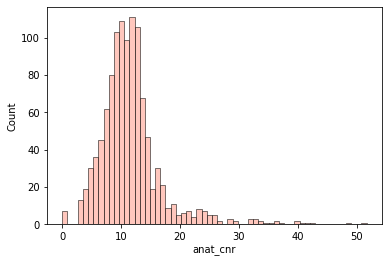

In [6]:
#Histogram of Age distrbution
sns.histplot(data=df,x='anat_cnr',color="#ffb5a7")

<AxesSubplot:>

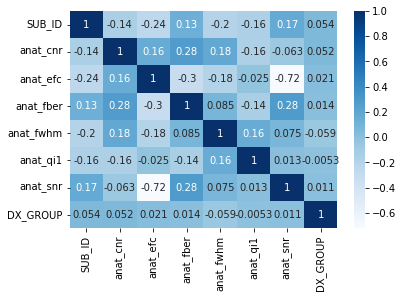

In [7]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [8]:
#Replacing categorical data with integer values
df['DX_GROUP'].replace([1,2],['ASD','TD'], inplace=True)

<AxesSubplot:ylabel='DX_GROUP'>

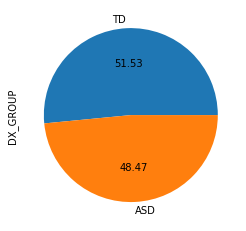

In [9]:
df['DX_GROUP'].value_counts().plot(kind="pie", autopct="%.2f")


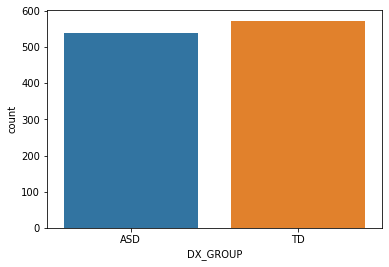

In [10]:
sns.countplot(x = 'DX_GROUP', data = df);


In [11]:
# split into input (X) and output (y) variables
X=df[['SUB_ID','anat_cnr','anat_efc','anat_fber','anat_fwhm','anat_qi1','anat_snr']]
y=df['DX_GROUP']

In [3]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(7,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=keras.optimizers.Adam())

NameError: name 'Sequential' is not defined

In [2]:
#model.fit(X, y, epochs=10)
